# Gaussian and Random Functions

A Gaussian Normal Distribution, often called a normal distribution, or a normal error function, is the least biased (maximum entropy) probability assumption to make if all you know about a set of data is its mean and standard deviation. It is also the distribution you get from combining many different random variables, even if the individual elements aren't normally distributed.

First import a bunch of components we will use...


In [1]:
# gets all of numpy but you will still need to refer to e.g. numpy.random.randn() as random.randn()
from numpy import *               # all of the array capable elements for numerical data          
from scipy.stats import norm      # comprehensive functions for Gaussian normal distributions
import csv                        # library for reading and writing comma separated value files
from matplotlib.pyplot import *   # all of pyplot to graph the results of our calculations

# put figures inline in the notebook, so you don't have to call show()
%matplotlib inline

# This lets you make the default figure size larger (or smaller)
from IPython.core.pylabtools import figsize
figsize(14, 7)


**norm.pdf(x,mean,standard_deviation)** returns the probability density at x for a gaussian

**norm.cdf(x,mean,standard_deviation)** returns the cumulative probability density at x for a gaussian

**norm.interval(probability,mean,standard_deviation)** returns the symmetric limits for probability about mean

**random.rand(n)** returns n random numbers between 0 and 1

**random.randn(n)** returns n random numbers gaussian distributed with a mean of 0 and standard deviation of 1

**random.randint(low, high, n)**	returns n random integers from low (inclusive) to high (exclusive)

The distribution looks like this for a mean of zero and a standard deviation of one. The probability of any one sample lying between $\pm$one standard deviation is about 68%, $\pm$two standard deviations about 95%, and $\pm$three standard deviations about 99%. 

scipy.stats.norm (http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.stats.norm.html) gives you a whole lot of functions, including cdf() for the cumulative distribution (the integral of the pdf). There's a little over 80% probability that a sample will be less than 1.


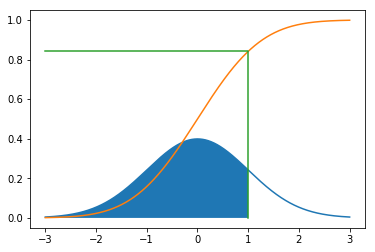

In [2]:
x = linspace(-3,3,1000)
f = norm.pdf(x,0,1) 
g = norm.cdf(x,0,1)
plot(x,f)
plot(x,g)
xto1 = linspace(-3,1,1000)
fto1 = norm.pdf(xto1,0,1) 
fill_between(xto1,0,fto1)
plot([1,1,-3],[0,norm.cdf(1,0,1),norm.cdf(1,0,1)])

## 95% Confidence Interval
What range of values will you expect for your measurement 95% of the time, if the mean value is 192 and the standard deviation 10?

So the interval containing 95% of the samples isn't exactly $\pm$two standard deviations, but very close:

In [3]:
norm.interval(0.95,192,10)

(172.40036015459947, 211.59963984540053)

## Probability of a random value lying in a range
What is the probability of getting a result between 2.7 and 4.0 is the variable is normally distributed with a mean of 3.1 and a standard deviation of 0.65?

Integrate the area under the PDF or take the difference between the two CDF values, since the CDF is the integral up to a given value. Try using different values for low,high, m, s.


0.6477645731492004


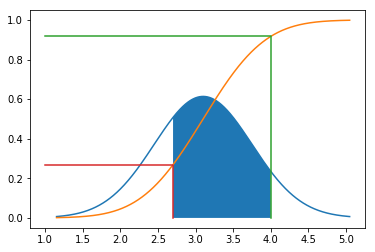

In [4]:
low = 2.7
high = 4.0
m = 3.1
s = 0.65
ph = norm.cdf(high,m,s)  # probability value is lower than "high"
pl = norm.cdf(low,m,s)   # probability value is lower than "low"
p = ph - pl
print(p)
x = linspace(m-3*s,m+3*s,1000)
y = linspace(low,high,1000)
f = norm.pdf(x,m,s) 
g = norm.pdf(y,m,s)
h = norm.cdf(x,m,s)
plot(x,f)
plot(x,h)
fill_between(y,0,g)
plot([high,high,1],[0,ph,ph])
plot([low,low,1],[0,pl,pl])

## Histograms compare frequency of occurence

Text(0,0.5,'counts / bin')

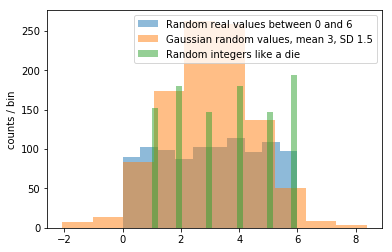

In [5]:
n = 1000
r1 = random.rand(n) * 6
r2 = random.randn(n) * 1.5 + 3
r3 = random.randint(1,7,n)
hist(r1,alpha=0.5, label = 'Random real values between 0 and 6')
hist(r2,alpha=0.5, label = 'Gaussian random values, mean 3, SD 1.5')
hist(r3,alpha=0.5,bins = 24, label = 'Random integers like a die')
legend()
ylabel('counts / bin')


## Faking a Gaussian
We could do some floating point math with exponentials that could take a long time on a microcontroller, or get a really good simulation by combining multiple random integers. 

This is a practical demonstration that combining multiple random variables tends towards a Gaussian distribution, even if the individual distributions are something else. Multiple sources of error will combine to give a Gaussian distribution overall.

How many random integers does it take to be *good enough*? Note that the code reshapes the results to make the mean zero and the standard deviation 1. (Normalized)

12500.20306 1444.3604620737988
500.0081224 57.77441848295195
1.2281375916245453e-16 1.000000000000001


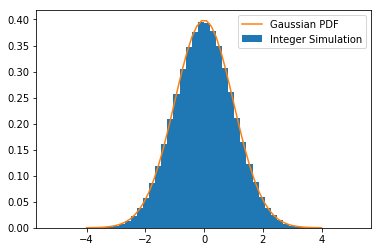

In [13]:
# float randn(){
#   // A pretty good fake Gaussian with mean = 0 and SD = 1 from random integers.
#   // Arduino doesn't provide numpy.random.randn() like Python does.
#   // See the python learning sequence 3.2 for a test
#   // For 25 random numbers between 0 and 1000 inclusive 
#   // the mean will be 12500 and SD about 1445
#   long tot = 0;
#   for(int i = 0; i < 25; i++) tot += random(0,1001);
#   return (tot - 12500.)/1445.;   // subtract the mean and divide by standard deviation
# }

n = 1000000    # the number of random tests to make
m = 25         # the number of random variables to combine
tot = random.randint(0,1001,n)
for i in range(0,m-1): tot += random.randint(0,1001,n)
mn = mean(tot)
sd = std(tot)
print(mean(tot),std(tot))
print(mean(tot)/m,std(tot)/m)
tot = tot - mn         # subtract the mean of many samples
tot = tot / sd         # divide by the standard deviation of many samples
print(mean(tot),std(tot))
hist(tot,bins=50,density=True,label = 'Integer Simulation')
x = linspace(-4,4)
plot(x,norm.pdf(x),label = 'Gaussian PDF')
legend()

In [14]:
# Comments start with # and are ignored by the system.
# import all the functionality from the numpy library
from numpy import *
def f(x):          # way shorter than the version above
    return x**2 + 2 * x + 1

z = sin(25.0)      # use the sin() function from numpy
y = 5 + f(27 + z)
print(y)


781.6058189802787
